In [298]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings

In [299]:
warnings.filterwarnings('ignore')

In [300]:
data = np.load('proyecto_training_data.npy')

In [301]:
dataFrame = pd.DataFrame(data, columns=['SalePrice','OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])

In [302]:
dataFrame

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


### Check for NA's

In [303]:
cols_na = [col for col in dataFrame.columns if(dataFrame[col].isnull().mean()>0)]
cols_na

['LotFrontage']

In [304]:
dataFrame[cols_na].isnull().mean()

LotFrontage    0.177397
dtype: float64

In [305]:
dataFrame['LotFrontage'] = np.round(dataFrame['LotFrontage'].fillna(dataFrame['LotFrontage'].mean()))

In [306]:
cols_na = [col for col in dataFrame.columns if(dataFrame[col].isnull().mean()>0)]
cols_na

[]

### Data split test/train


In [307]:
x_train, x_test, y_train, y_test = train_test_split(dataFrame.drop('SalePrice', axis=1), dataFrame['SalePrice'], test_size=0.2)

### Media, Max, Min, Rango y Std

In [308]:
#SalePrice
print('SalePrice')
#media
print('media',dataFrame.SalePrice.mean())
#max
print('max',dataFrame.SalePrice.max())
#min
print('min',dataFrame.SalePrice.min())
#rango
print('rango inferior',dataFrame.SalePrice.min(), 'rango superior',dataFrame.SalePrice.max())
#desviacion estandar
print('desviacion estandar',dataFrame.SalePrice.std())

SalePrice
media 180921.19589041095
max 755000.0
min 34900.0
rango inferior 34900.0 rango superior 755000.0
desviacion estandar 79442.50288288663


In [309]:
#OverallQual
print('OverallQual')
#media
print('media',dataFrame.OverallQual.mean())
#max
print('max',dataFrame.OverallQual.max())
#min
print('min',dataFrame.OverallQual.min())
#rango
print('rango inferior',dataFrame.OverallQual.min(), 'rango superior',dataFrame.OverallQual.max())
#desviacion estandar
print('desviacion estandar',dataFrame.OverallQual.std())

OverallQual
media 6.0993150684931505
max 10.0
min 1.0
rango inferior 1.0 rango superior 10.0
desviacion estandar 1.3829965467415923


In [310]:
#1stFlrSF
print('1stFlrSF')
#media
print('media',dataFrame['1stFlrSF'].mean())
#max
print('max',dataFrame['1stFlrSF'].max())
#min
print('min',dataFrame['1stFlrSF'].min())
#rango
print('rango inferior',dataFrame['1stFlrSF'].min(), 'rango superior',dataFrame['1stFlrSF'].max())
#desviacion estandar
print('desviacion estandar',dataFrame['1stFlrSF'].std())

1stFlrSF
media 1162.626712328767
max 4692.0
min 334.0
rango inferior 334.0 rango superior 4692.0
desviacion estandar 386.5877380410738


In [311]:
#TotRmsAbvGrd
print('TotRmsAbvGrd')
#media
print('media',dataFrame.TotRmsAbvGrd.mean())
#max
print('max',dataFrame.TotRmsAbvGrd.max())
#min
print('min',dataFrame.TotRmsAbvGrd.min())
#rango
print('rango inferior',dataFrame.TotRmsAbvGrd.min(), 'rango superior',dataFrame.TotRmsAbvGrd.max())
#desviacion estandar
print('desviacion estandar',dataFrame.TotRmsAbvGrd.std())

TotRmsAbvGrd
media 6.517808219178082
max 14.0
min 2.0
rango inferior 2.0 rango superior 14.0
desviacion estandar 1.625393290584064


In [312]:
#YearBuilt
print('YearBuilt')
#media
print('media',dataFrame.YearBuilt.mean())
#max
print('max',dataFrame.YearBuilt.max())
#min
print('min',dataFrame.YearBuilt.min())
#rango
print('rango inferior',dataFrame.YearBuilt.min(), 'rango superior',dataFrame.YearBuilt.max())
#desviacion estandar
print('desviacion estandar',dataFrame.YearBuilt.std())

YearBuilt
media 1971.267808219178
max 2010.0
min 1872.0
rango inferior 1872.0 rango superior 2010.0
desviacion estandar 30.202904042525265


In [313]:
#LotFrontage
print('LotFrontage')
#media
print('media',dataFrame.LotFrontage.mean())
#max
print('max',dataFrame.LotFrontage.max())
#min
print('min',dataFrame.LotFrontage.min())
#rango
print('rango inferior',dataFrame.LotFrontage.min(), 'rango superior',dataFrame.LotFrontage.max())
#desviacion estandar
print('desviacion estandar',dataFrame.LotFrontage.std())

LotFrontage
media 70.04109589041096
max 313.0
min 21.0
rango inferior 21.0 rango superior 313.0
desviacion estandar 22.024030962875983


### Histogramas

In [314]:
def snsPlotVsSalesPrice(dataset, col):
    plt.subplots(figsize=(18,6))
    sns.histplot(x=dataset[col], kde=True)
    plt.xticks(rotation=90)

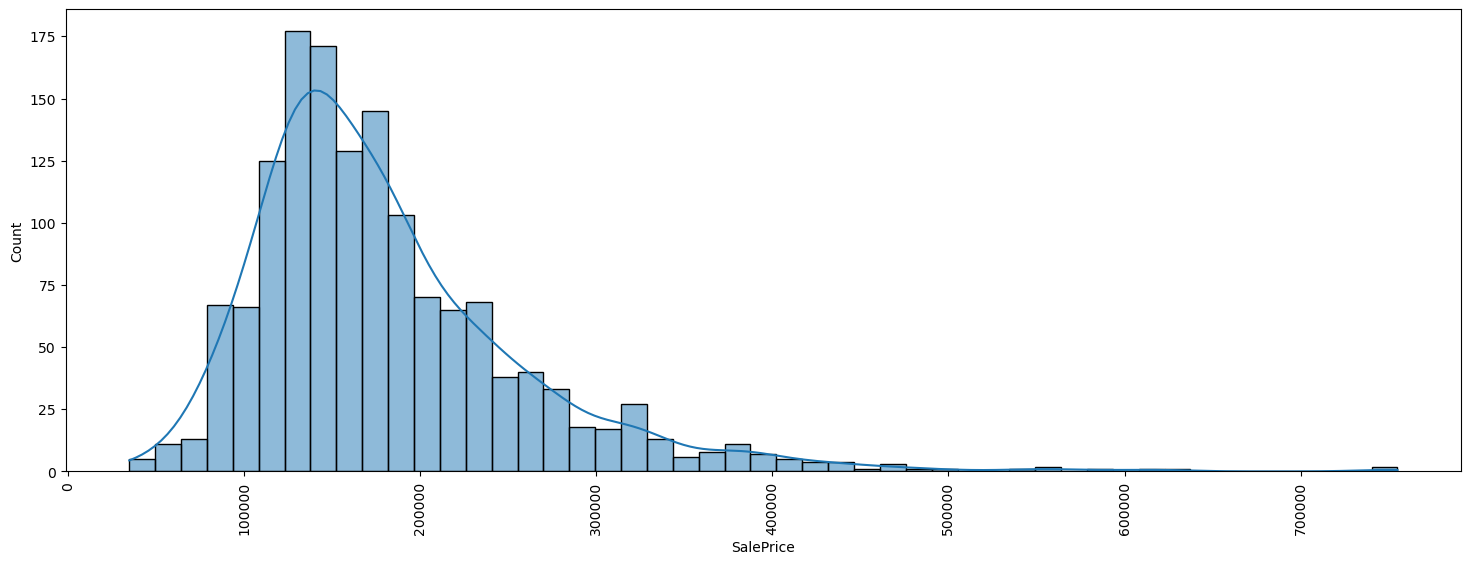

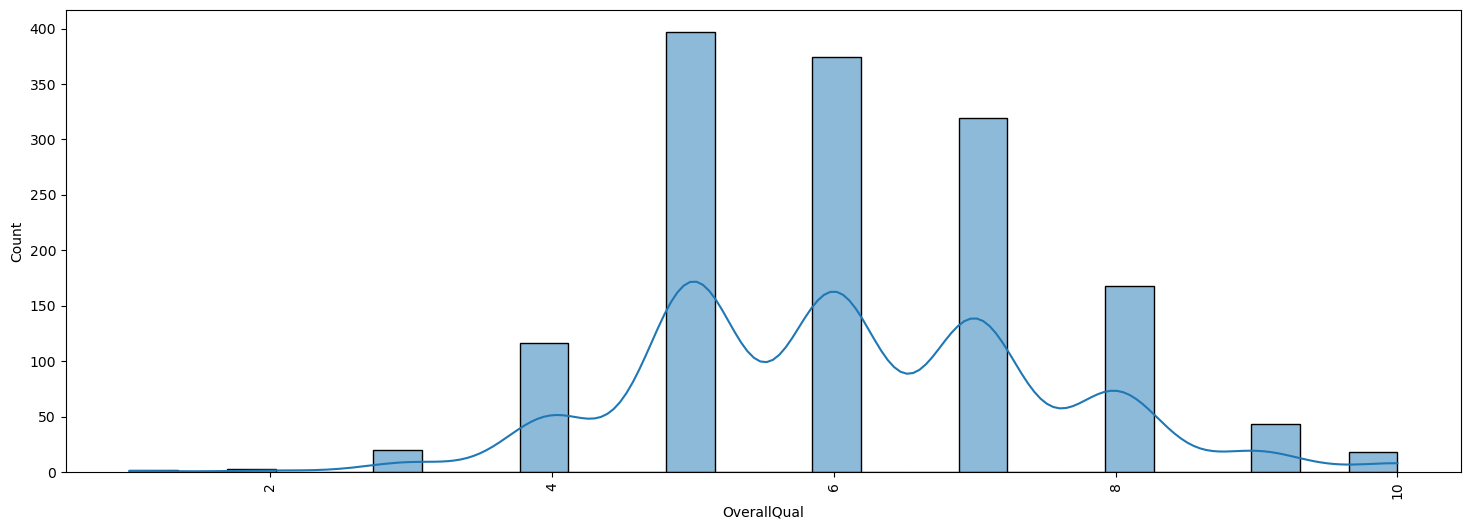

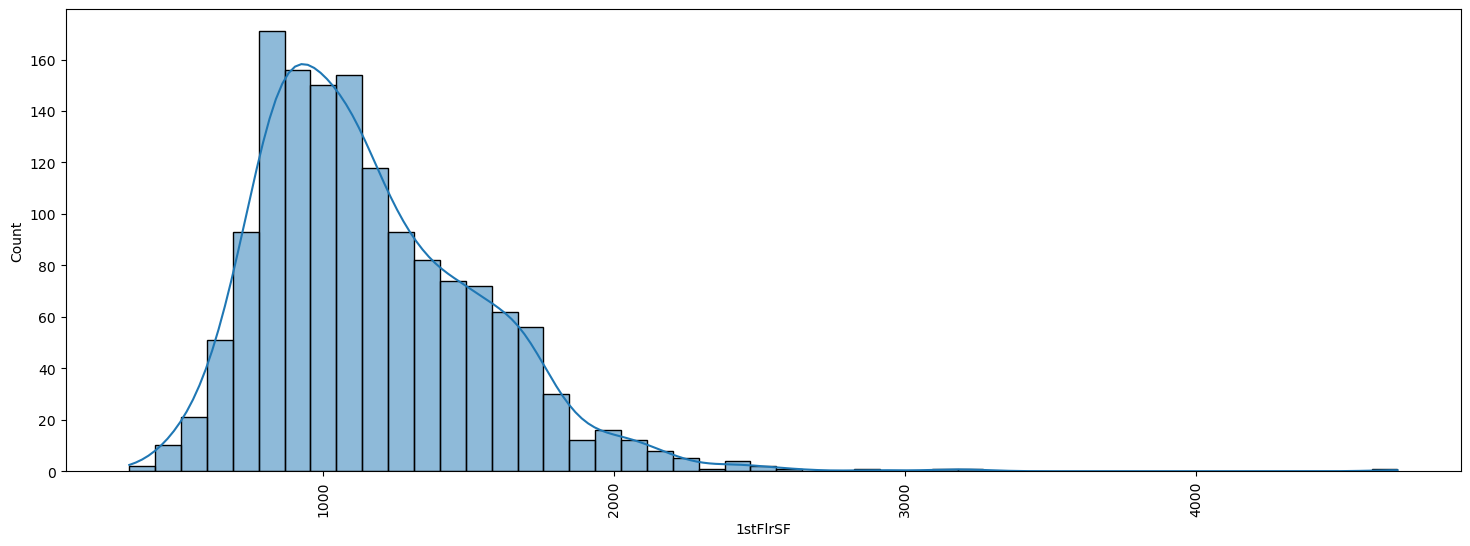

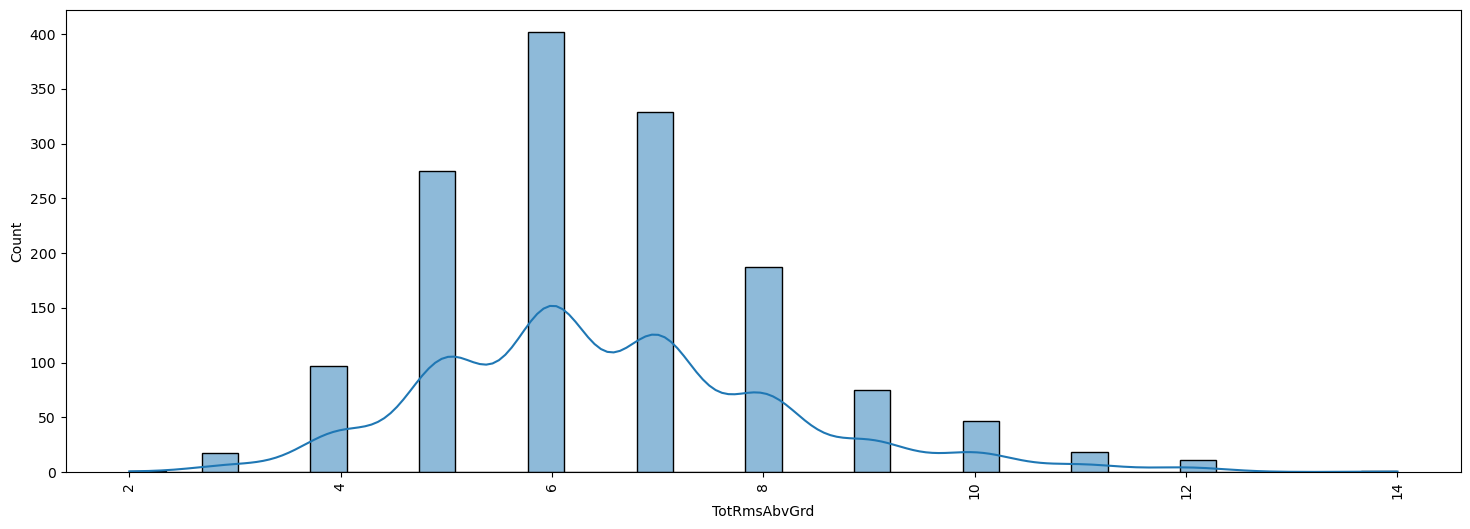

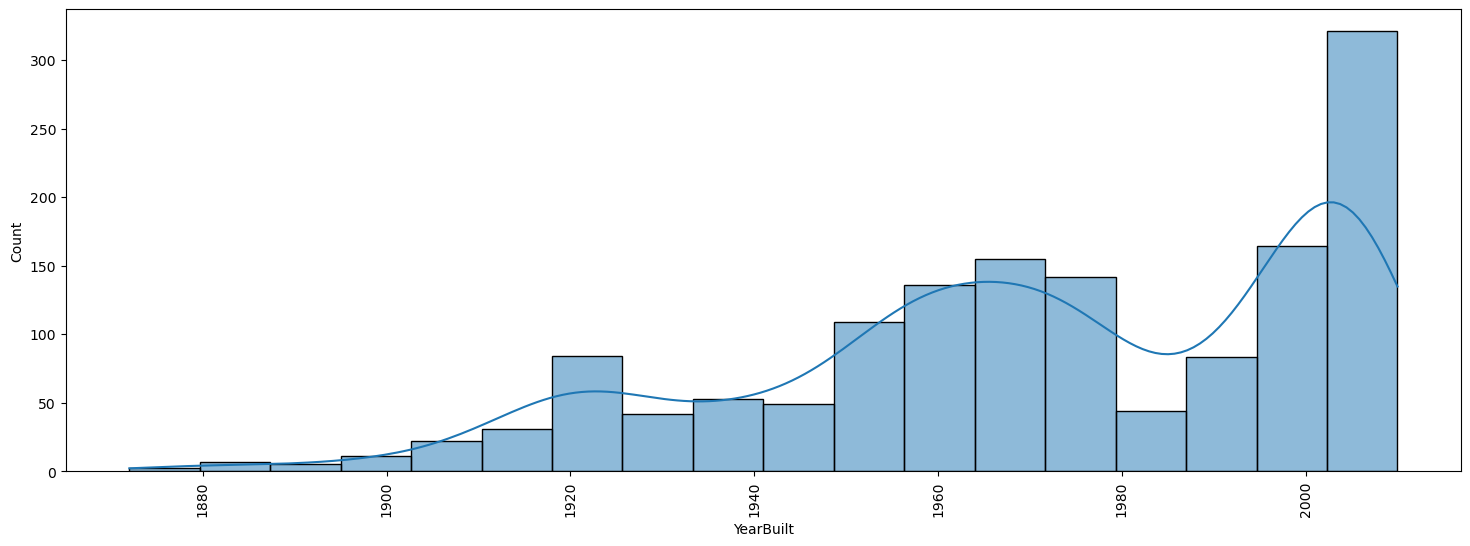

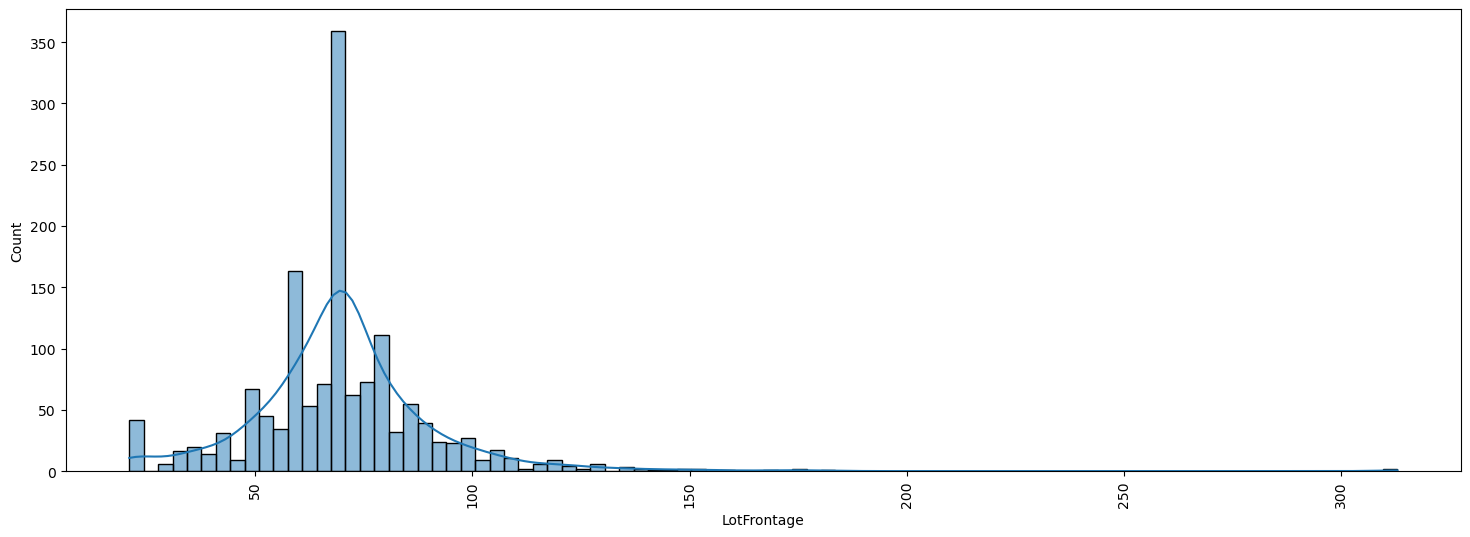

In [315]:
for col in dataFrame.columns:
    snsPlotVsSalesPrice(dataFrame, col)

### Analisis de variables independientes X

In [316]:
def correlacion(x,y):
    return(round(x.corr(y),2))

In [317]:
def scatter_plot(x,y):
    corr = correlacion(x,y)
    plt.subplots(figsize=(18,6))
    plt.scatter(x,y)
    #title_name = 'Correlacion entre',y.name,'Vs', x.name,corr
    plt.title(corr)
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    plt.show

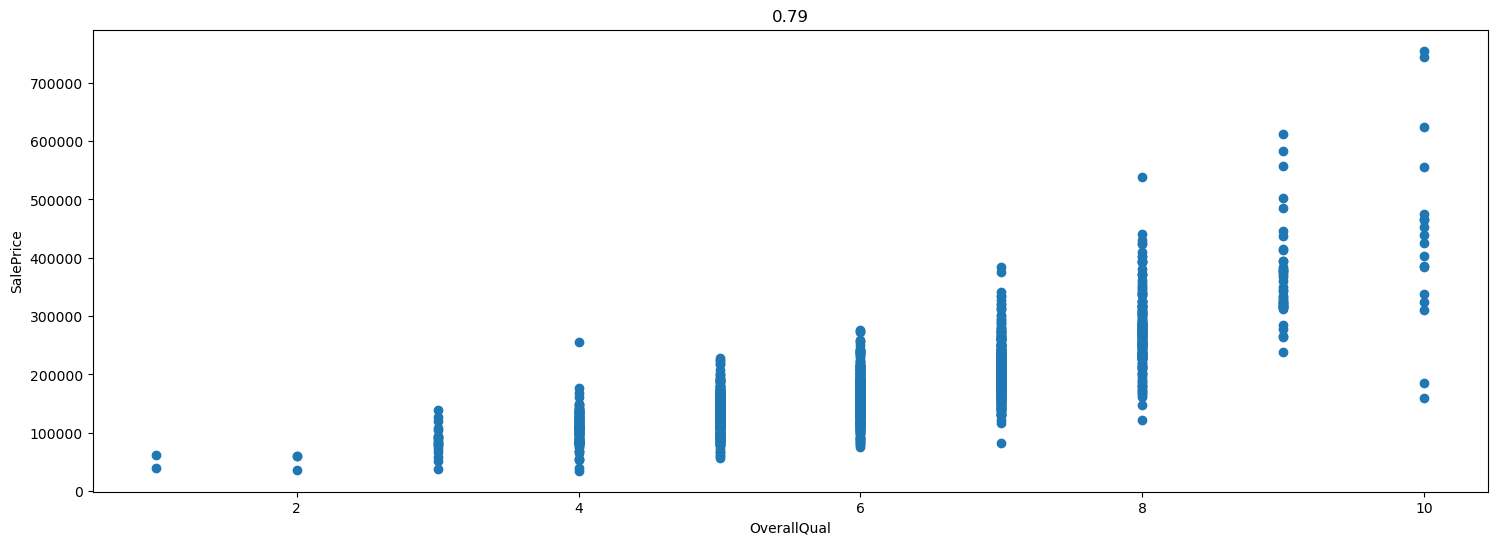

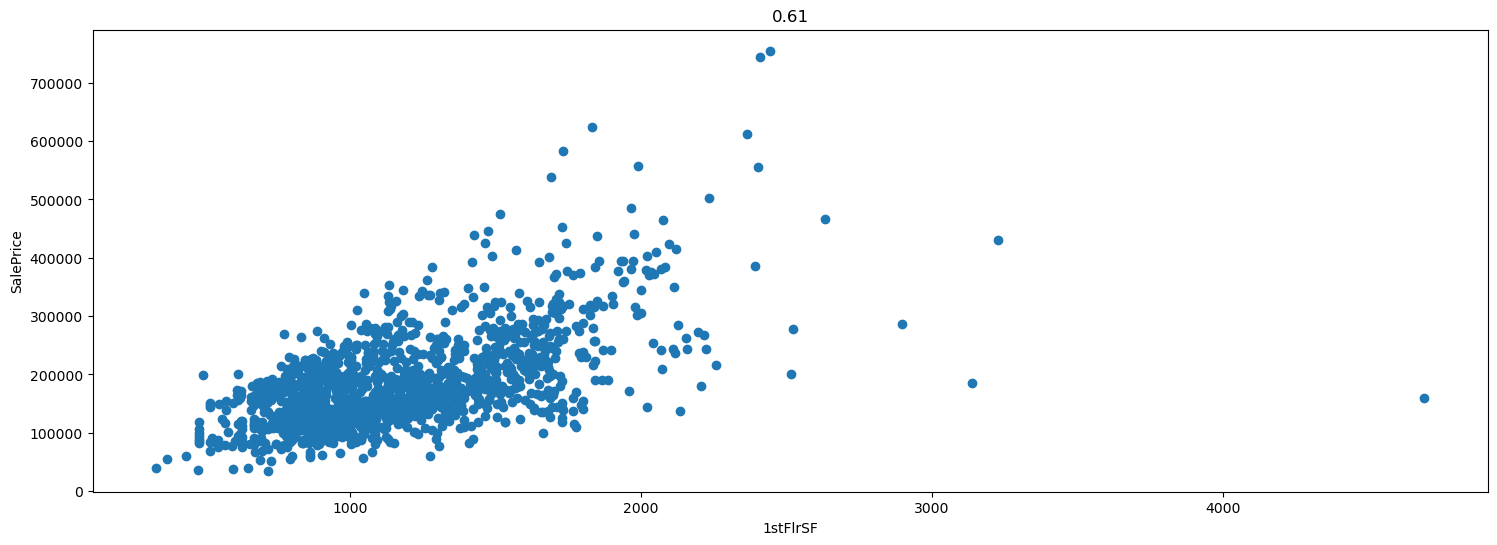

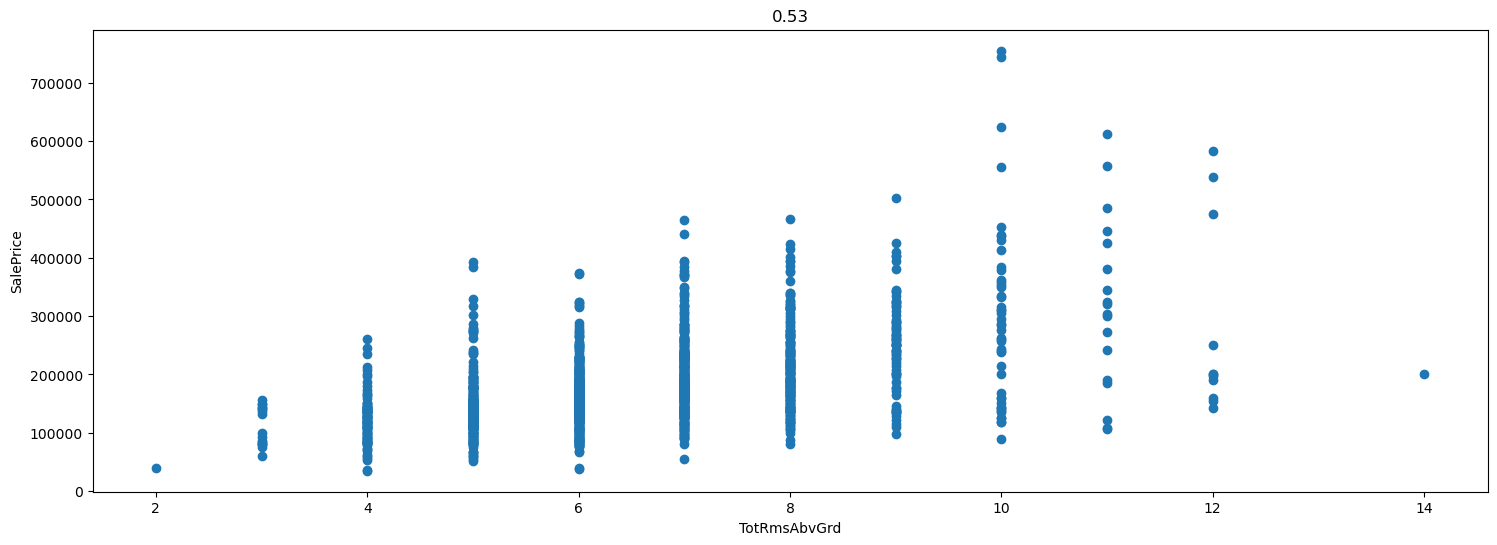

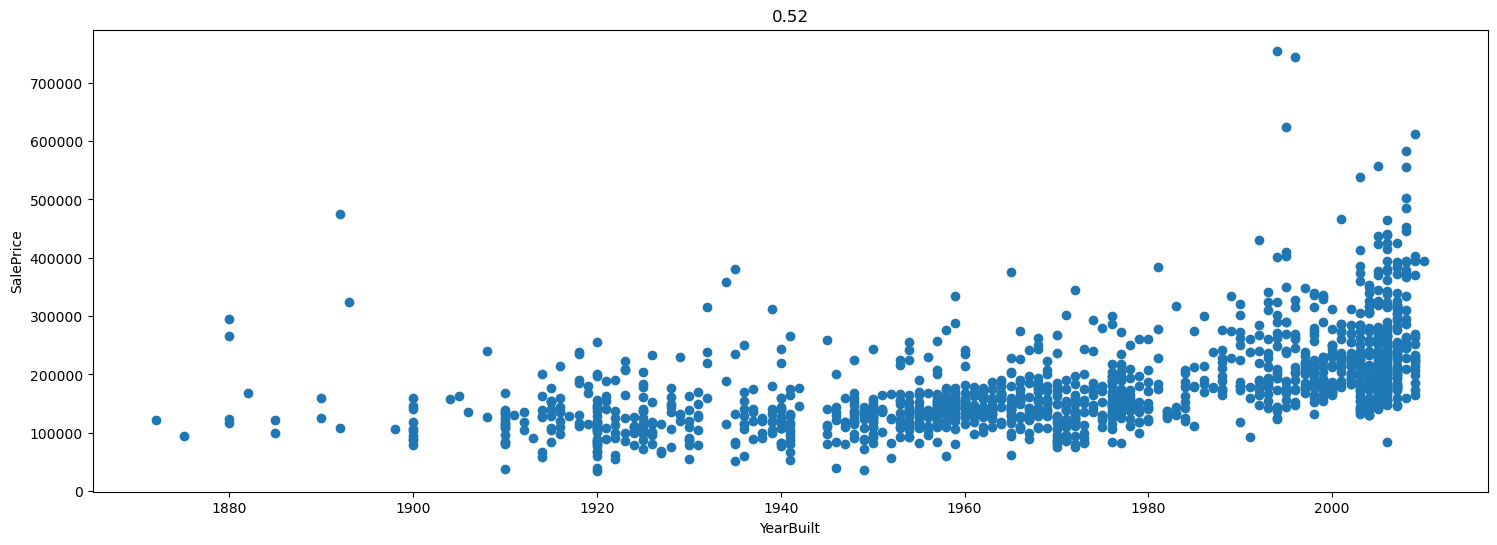

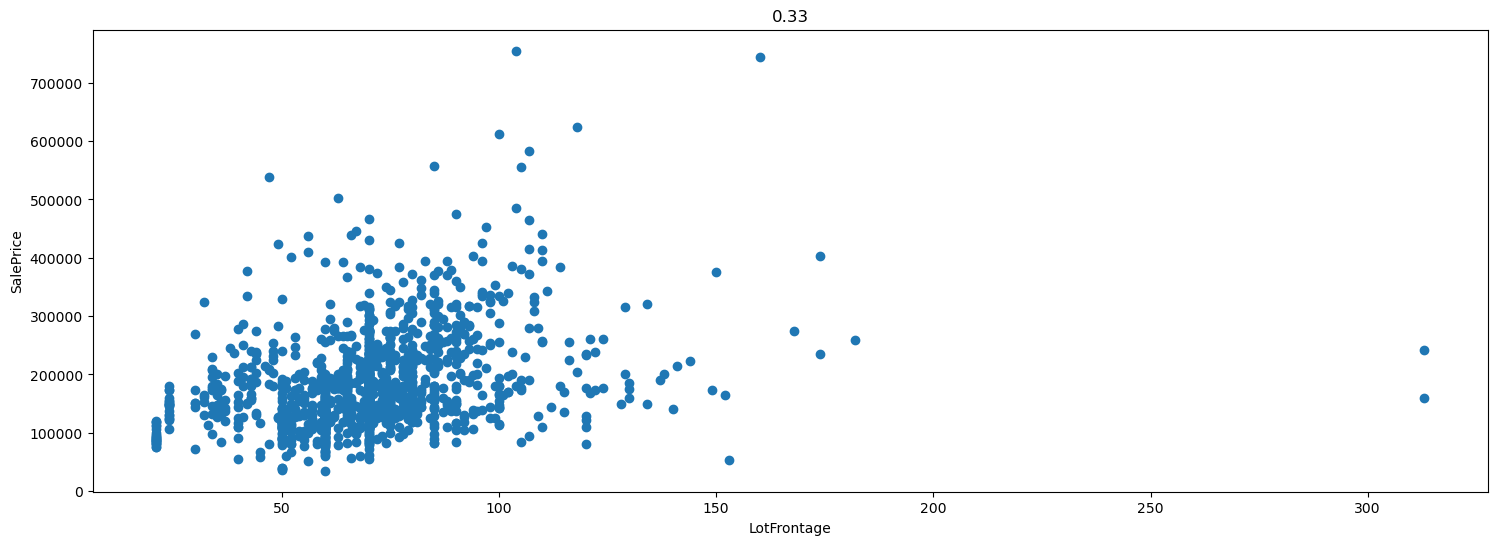

In [318]:
for col in dataFrame.columns:
    if col == 'SalePrice':
        continue
    scatter_plot(dataFrame[col], dataFrame['SalePrice'])

### Funciones

In [319]:
def betas(x, y):
    y_col = y
    x_col = x

    y_sum = y_col.sum()
    x_sum = x_col.sum()

    x_pow = x_col**2
    x_pow_sum = x_pow.sum()
    x_sum_pow = x_sum**2

    x_y_mult = y_col * x_col
    x_y_mult_sum = x_y_mult.sum()

    n = len(y_col)

    denominator = (n*x_pow_sum - x_sum_pow)
    b0_num = (x_pow_sum*y_sum - x_sum*x_y_mult_sum)
    b1_num = (n*x_y_mult_sum - x_sum*y_sum)

    b0 = b0_num/denominator
    b1 = b1_num/denominator

    return(b0, b1)

In [320]:
def error(y, y_prima):
    n = len(y)
    delta_y_pow = ((y-y_prima)**2).sum()
    err = delta_y_pow/(2*n)
    return(err)

In [321]:
def gradiente(x, y, y_prima):
    n = len(y)
    delta_y_por_x = ((y_prima-y)*x).sum()
    delta_y = (y_prima-y).sum()

    gradiente_b1 = delta_y_por_x/n
    gradiente_b0 = delta_y/n
    #print(gradiente_b0,gradiente_b1)
    return(gradiente_b0, gradiente_b1)


In [322]:
def betas_actualizados(b0, b1, learning_rate, gradiente_b0, gradiente_b1):
    new_b0 = b0 - learning_rate*(gradiente_b0)
    new_b1 = b1 - learning_rate*(gradiente_b1)
    return(new_b0, new_b1)

In [323]:
def modelo (x, y, epochs, imprimir_error_cada, learning_rate):

    resultados = pd.DataFrame(columns=['Iteracion', 'b0', 'b1'])
    errores = {}
    res_y = pd.DataFrame()

    matrix_ones = pd.DataFrame([x]).T
    matrix_ones['ones'] = 1
    b0 = 0
    b1 = 0
    i=0
    j=1

    while i < epochs:

        y_prima = x*b1 + b0
        matrix_ones['ones'] = matrix_ones['ones']*y_prima

        err = error(y, y_prima)

        if j == imprimir_error_cada:
            print(err)
            j=0

        grad_0, grad_1 = gradiente(x, y, y_prima)
        resultados.loc[len(resultados)] = [i,b0,b1]
        b0, b1 = betas_actualizados(b0, b1, learning_rate, grad_0, grad_1)
        errores[i] = err
        res_y[i] = y_prima

        i+=1
        j+=1

    return(resultados, errores, res_y)

In [324]:
def error_plot(keys, vals):
    plt.subplots(figsize=(18,6))
    plt.plot(keys, vals)
    plt.show()

In [325]:
def evolucion_modelo(x, y, res, n):
    plt.subplots(figsize=(18,6))
    plt.plot(x,y,'o')
    i = n
    plt.plot(x,(res['b0'][0] + res['b1'][0]*x), label='0')
    while i <= len(res):
        #print(res['b0'][i-1], res['b1'][i-1])
        plt.plot(x,(res['b0'][i-1] + res['b1'][i-1]*x), label=i-1)
        i+=n
        plt.legend(loc='upper left')
    plt.show()

### model test

In [326]:
res, err, res_y = modelo(x_train['OverallQual'], y_train, 50000, 5000, 0.001)

1411454059.3474643
1347520818.156129
1308162981.3050902
1283933968.4671974
1269018385.953843
1259836228.876245
1254183616.3468854
1250703820.8982723
1248561629.7784517
1247242879.046804


In [327]:
res

,Iteracion,b0,b1
0,0.0,0.000000,0.000000
1,1.0,181.797803,1198.258137
2,2.0,356.107306,2348.525894
3,3.0,523.228624,3452.726554
4,4.0,683.449844,4512.706324
...,...,...,...
49995,49995.0,-90387.283020,44711.414060
49996,49996.0,-90387.730375,44711.483866
49997,49997.0,-90388.177708,44711.553670
49998,49998.0,-90388.625020,44711.623469


In [328]:
res_y

,0,1,2,3,4,5,6,7,8,9,...,49990,49991,49992,49993,49994,49995,49996,49997,49998,49999
363,0.0,7371.346625,14447.262668,21239.587949,27759.687790,34018.472031,40026.413284,45793.564455,51329.575566,56643.709898,...,177881.343940,177881.315417,177881.286896,177881.258375,177881.229857,177881.201339,177881.172824,177881.144309,177881.115796,177881.087284
838,0.0,6173.088488,12098.736774,17786.861395,23246.981465,28488.234610,33519.392249,38348.874273,42984.763134,47434.817369,...,133170.278963,133170.180617,133170.082275,133169.983939,133169.885607,133169.787279,133169.688957,133169.590639,133169.492327,133169.394018
332,0.0,9767.862899,19144.314455,28145.041057,36785.100439,45078.946873,53040.455355,60682.944821,68019.200430,75061.494956,...,267303.473894,267303.585017,267303.696136,267303.807249,267303.918357,267304.029459,267304.140556,267304.251648,267304.362734,267304.473815
1253,0.0,8569.604762,16795.788561,24692.314503,32272.394114,39548.709452,46533.434320,53238.254638,59674.387998,65852.602427,...,222592.408917,222592.450217,222592.491516,222592.532812,222592.574107,222592.615399,222592.656690,222592.697978,222592.739265,222592.780550
1439,0.0,8569.604762,16795.788561,24692.314503,32272.394114,39548.709452,46533.434320,53238.254638,59674.387998,65852.602427,...,222592.408917,222592.450217,222592.491516,222592.532812,222592.574107,222592.615399,222592.656690,222592.697978,222592.739265,222592.780550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,0.0,6173.088488,12098.736774,17786.861395,23246.981465,28488.234610,33519.392249,38348.874273,42984.763134,47434.817369,...,133170.278963,133170.180617,133170.082275,133169.983939,133169.885607,133169.787279,133169.688957,133169.590639,133169.492327,133169.394018
804,0.0,6173.088488,12098.736774,17786.861395,23246.981465,28488.234610,33519.392249,38348.874273,42984.763134,47434.817369,...,133170.278963,133170.180617,133170.082275,133169.983939,133169.885607,133169.787279,133169.688957,133169.590639,133169.492327,133169.394018
849,0.0,7371.346625,14447.262668,21239.587949,27759.687790,34018.472031,40026.413284,45793.564455,51329.575566,56643.709898,...,177881.343940,177881.315417,177881.286896,177881.258375,177881.229857,177881.201339,177881.172824,177881.144309,177881.115796,177881.087284
317,0.0,9767.862899,19144.314455,28145.041057,36785.100439,45078.946873,53040.455355,60682.944821,68019.200430,75061.494956,...,267303.473894,267303.585017,267303.696136,267303.807249,267303.918357,267304.029459,267304.140556,267304.251648,267304.362734,267304.473815


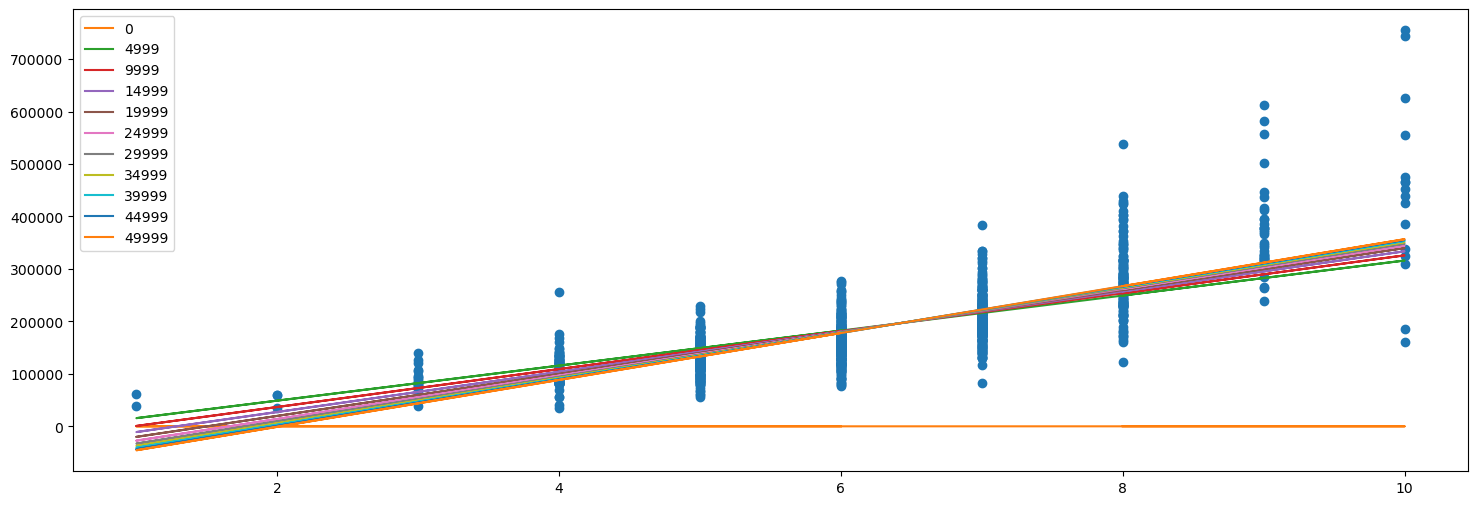

In [329]:
evolucion_modelo(x_train['OverallQual'], y_train, res,5000)

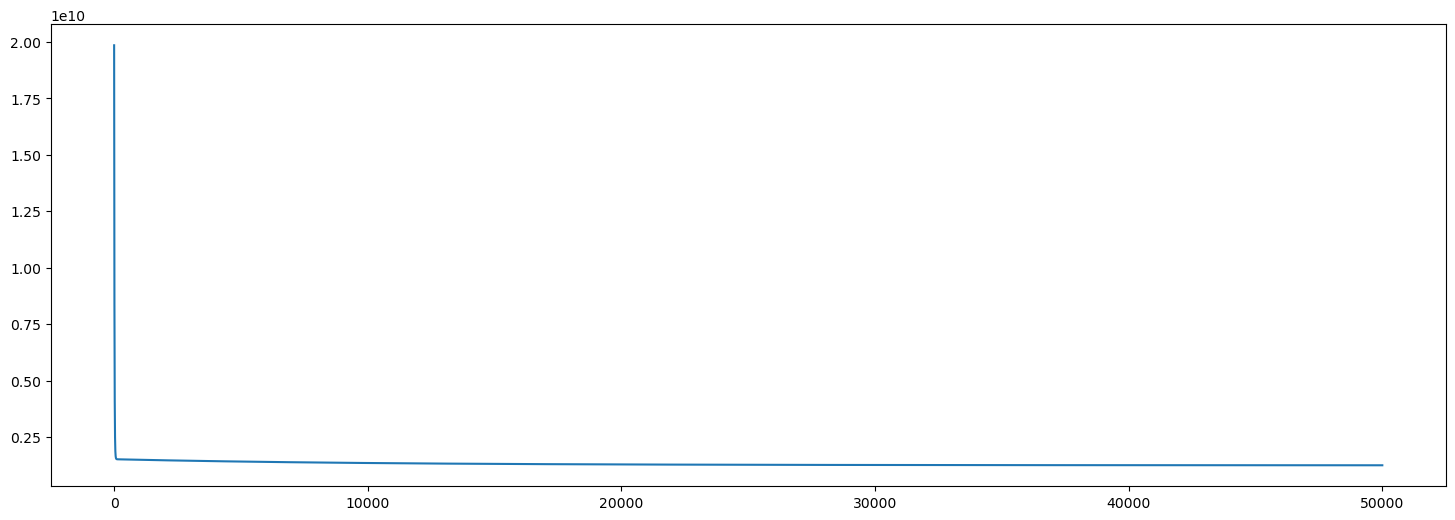

In [330]:
error_plot(err.keys(), err.values())

### SKlearn model

In [331]:
def sk_model(x_train, y_train, x_test, y_test):
    x_train = np.array(x_train).reshape(-1,1)
    y_train = np.array(y_train).reshape(-1,1)
    x_test = np.array(x_test).reshape(-1,1)
    y_test = np.array(y_test).reshape(-1,1)

    model = LinearRegression()
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    return(pred, model.coef_, model.intercept_)


In [332]:
pred, model_b1, model_b0 = sk_model(x_train['OverallQual'], y_train, x_train['OverallQual'], y_test)

In [333]:
model_b0

array([-99608.57243532])

In [334]:
model_b1

array([[46150.32948673]])

### estimacion promedio

In [335]:
def estimacion_promedio(x_train, y_train, res_y):
    pred, b0, b1 = sk_model(x_train, y_train, x_train, y_test)
    promedio = (np.array(pred).reshape(-1) + np.array(res_y[len(res_y.columns)-1]).reshape(-1))/2
    cols = {'Promedio': promedio, 'My modelo':np.array(res_y[len(res_y.columns)-1]), 'SK learn': np.array(pred).reshape(-1), 'Valor real': y_train,}
    promedio_df = pd.DataFrame(data=cols)
    return(promedio_df)

In [336]:
estimacion_promedio(x_train['OverallQual'], y_train, res_y)

,Promedio,My modelo,SK learn,Valor real
363,177587.245885,177881.087284,177293.404485,118000.0
838,132156.234508,133169.394018,131143.074998,144000.0
332,268449.268637,267304.473815,269594.063458,284000.0
1253,223018.257261,222592.780550,223443.733972,294000.0
1439,223018.257261,222592.780550,223443.733972,197000.0
...,...,...,...,...
505,132156.234508,133169.394018,131143.074998,124500.0
804,132156.234508,133169.394018,131143.074998,118000.0
849,177587.245885,177881.087284,177293.404485,187000.0
317,268449.268637,267304.473815,269594.063458,270000.0


### Estimaciones

In [337]:
pred, model_b1, model_b0 = sk_model(x_train['OverallQual'], y_train, x_test['OverallQual'], y_test)

In [338]:
pred_my_model = x_test['OverallQual']*res['b1'][len(res)-1] + res['b0'][len(res)-1]

In [339]:
pd.DataFrame({'SK-learn':np.array(pred).reshape(-1), 'My modelo':np.array(pred_my_model).reshape(-1), 'Valor real':np.array(y_test).reshape(-1)})

,SK-learn,My modelo,Valor real
0,223443.733972,222592.780550,260400.0
1,361894.722432,356727.860346,402861.0
2,269594.063458,267304.473815,263435.0
3,223443.733972,222592.780550,157000.0
4,223443.733972,222592.780550,198900.0
...,...,...,...
287,131143.074998,133169.394018,149900.0
288,223443.733972,222592.780550,203000.0
289,177293.404485,177881.087284,240000.0
290,177293.404485,177881.087284,160000.0


### Link al video mostrandoi el proyecto

https://drive.google.com/drive/folders/14KBeiBCkNBMgYZYguoihSOn-uY7QB-lN